In [146]:
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
from sklearn import linear_model as lm

In [13]:
url = "http://www.gutenberg.org/cache/epub/13065/pg13065.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')

In [11]:
title = raw[:raw.index('\n')].strip()
print(title.replace('The Project Gutenberg EBook of ',''))

Beethoven's Letters 1790-1826, Vol 1 of 2


In [77]:
beg = raw.find("BEETHOVEN'S LETTERS")
end = raw.find('End of Project Gutenberg')
raw = raw[beg:end]

pattern = r'''(?x)     # set flag to allow verbose regexps
    (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
  | \w+(?:-\w+)*       # words with optional internal hyphens
  | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
  | \.\.\.             # ellipsis
#  | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''

tokens_raw = nltk.regexp_tokenize(raw,pattern)
text = nltk.Text(tokens)

How many total unique words are in the corpus? 

In [89]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

stops = set(stopwords.words('english'))

stems = {}
tokens = []
w = ''

for word in tokens_raw:
    if not word.isdigit() & word.isalnum():
        w = porter.stem(word).translate(string.punctuation).lower()
        tokens.append(w)
        if w in stems:
            if not word.lower() in stems[w]:
                stems[w].append(word.lower())
        else:
            stems[w]=[word.lower()]

fdist1 = nltk.FreqDist(tokens)
filtered_word_freq = dict((word, freq) for word, freq in fdist1.items())
#print(filtered_word_freq)
print('The text has ' + str(len(filtered_word_freq.keys())) + ' unique words')

The text has 4643 unique words


 How many unique words represent half of the total words in the corpus

In [124]:
nWords = len(tokens_raw)
n = 0.00
w = 1.00
counter = 1
topWords = []
for i in {k: v for k, v in sorted(filtered_word_freq.items(), key=lambda item: item[1], reverse=True)}.items():
    counter+=1
    n += i[1]
    #print((w,i[0],i[1]))
    topWords.append((counter,i[0],i[1]))
    if n<=(nWords/2):
        w += 1
    if counter==200:
        break
print(str(w) + ' unique words account for half of the total words in the corpus')
print('\n')
print('Top 200 Words:\n')
for i in topWords:
    print(i[1], stems[i[1]])

68.0 unique words account for half of the total words in the corpus


Top 200 Words:

the ['the']
to ['to']
i ['i']
of ['of']
and ['and']
in ['in']
you ['you']
my ['my']
a ['a']
that ['that']
for ['for']
me ['me', 'mes']
as ['as']
be ['be', 'being', 'beings']
it ['it', 'its']
have ['have', 'having']
is ['is']
your ['your', 'yours']
thi ['this']
with ['with']
not ['not']
on ['on']
at ['at']
beethoven ['beethoven']
hi ['his']
by ['by']
so ['so']
which ['which']
but ['but']
will ['will', 'willed', 'willing']
he ['he']
from ['from']
wa ['was']
all ['all']
s ['s']
no ['no', 'nos']
him ['him']
am ['am']
may ['may']
are ['are']
an ['an']
if ['if']
one ['one', 'ones']
time ['time', 'times']
can ['can']
shall ['shall']
must ['must']
do ['do', 'doing', 'doings']
when ['when']
or ['or']
friend ['friend', 'friends']
ha ['has', 'ha']
would ['would']
had ['had']
onli ['only']
work ['work', 'works', 'working']
same ['same']
letter ['letters', 'letter']
been ['been']
footnot ['footnote']
wish ['wish',

Does the observed relative frequency of these words follow Zipf’s law?

199


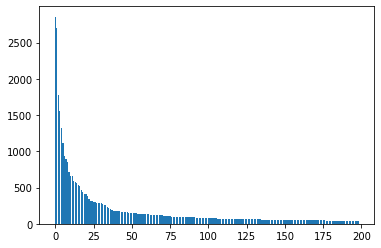

In [125]:
topPlot = {i[0]:filtered_word_freq[i[1]] for i in topWords}
print(len(topWords))
plt.bar(range(len(topPlot)), list(topPlot.values()), align='center')
#plt.xticks(range(len(topPlot)), list(topPlot.keys()))

plt.show()

In [151]:
zipf = [(math.log(i[0]),math.log(i[2])) for i in topWords]

The graphed rank vs. frequency appears to show a somewhat steady proportionality, aligning with Zipf's law:

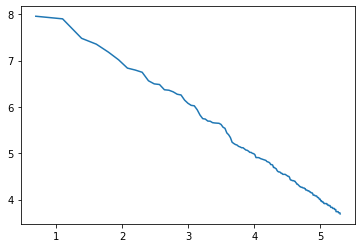

In [138]:
plt.plot([i[0] for i in zipf], [i[1] for i in zipf])

Further, running a simple linear regression model gives a good R^2 score of ~0.97

In [150]:
fit = lm.LinearRegression().fit(np.array([i[0] for i in zipf[:150]]).reshape(-1, 1), [i[1] for i in zipf[:150]])
fit.score(np.array([i[0] for i in zipf[151:]]).reshape(-1, 1), [i[1] for i in zipf[151:]])

0.9733787364685318